# eval timeseries

In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import datetime as dt
from dateutil.relativedelta import relativedelta
from salishsea_tools import evaltools as et, viz_tools
import cmocean as cmo
import netCDF4 as nc
from matplotlib.colors import LogNorm
from salishsea_tools import geo_tools
import gsw

%matplotlib inline

In [2]:
ssc = pd.read_csv('SSCeval.csv')

<ipython-input-2-5fa54ff8b3ed>:1: DtypeWarning: Columns (2,4,8,10,12,14,18,20) have mixed types. Specify dtype option on import or set low_memory=False.
  ssc = pd.read_csv('SSCeval.csv')


In [3]:
ssc.head()

,Unnamed: 0,"#""Time UTC (yyyy-mm-ddThh:mm:ss.fffZ)""","""Conductivity (S/m)""","""Conductivity QC Flag""","""Density (kg/m3)""","""Density QC Flag""","""Practical Salinity (psu)""","""Practical Salinity QC Flag""","""Pressure (decibar)""","""Pressure QC Flag""",...,i,j,k,mod_vosaline,mod_votemper,lat,lon,Sea Pressure (db),Real Salinity (g/kg),modelled T (C)
0,0,2013-01-01T00:05:37.997Z,3.51012,1,1026.7730957,1,33.3991,1,176.943,1,...,67,349,29,33.846893,7.014212,48.360383,-124.213367,166.5005,33.562267,7.018884
1,1,2013-01-01T00:20:38.026Z,3.51009,1,1026.772246375,1,33.3987,1,176.832,1,...,67,349,29,33.846893,7.014212,48.360383,-124.213367,166.3775,33.561862,7.018872
2,2,2013-01-01T00:35:37.968Z,3.51001,1,1026.766781808,1,33.3931,1,176.764,1,...,67,349,29,33.846893,7.014212,48.360383,-124.213367,166.2545,33.556233,7.018861
3,3,2013-01-01T00:50:37.997Z,3.51,1,1026.766435684,1,33.3932,1,176.664,1,...,67,349,29,33.846893,7.014212,48.360383,-124.213367,166.1205,33.556330,7.018848
4,4,2013-01-01T01:05:38.026Z,3.50998,1,1026.764712062,1,33.3920,1,176.529,1,...,67,349,29,33.848587,7.017017,48.360383,-124.213367,165.9745,33.555122,7.021665


In [4]:
ciops = pd.read_csv('CIOPSeval.csv')

In [5]:
ciops.head()

,Unnamed: 0,T,S,P
0,2015-11-22,9.333312,33.906963,171.641846
1,2015-11-23,9.367147,33.905380,171.641846
2,2015-11-24,9.354183,33.896626,171.641846
3,2015-11-25,9.332532,33.878441,171.641846
4,2015-11-26,9.274620,33.861267,171.641846


In [10]:
ssc['dtUTC'] = [ pd.to_datetime('{:%Y-%m-%d} {:%H:%M:%S}'.format(pd.to_datetime(ii), pd.to_datetime(ii))) for ii in ssc['#"Time UTC (yyyy-mm-ddThh:mm:ss.fffZ)"']]

In [13]:
ciops['dtUTC']=[ pd.to_datetime('{:%Y-%m-%d}'.format(pd.to_datetime(ii))) for ii in ciops['Unnamed: 0']]

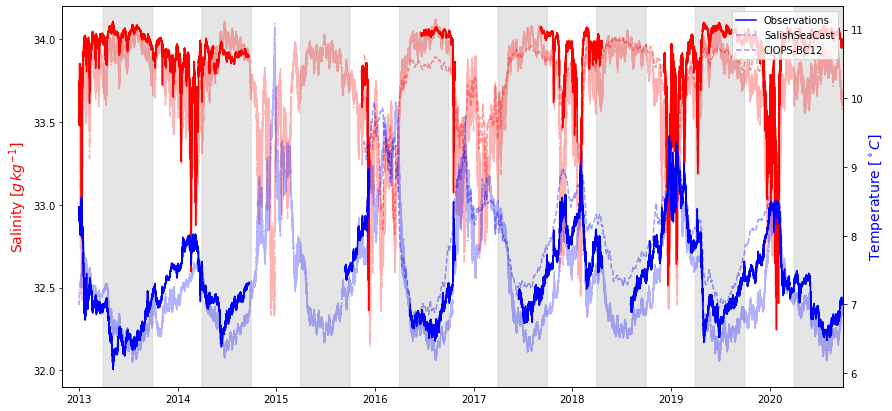

In [32]:
fig, ax = plt.subplots(figsize=(14, 7))

ax.plot(ssc['dtUTC'],ssc['Real Salinity (g/kg)'], c='r', label='Observations', zorder=4)
ax.plot(ssc['dtUTC'],ssc['mod_vosaline'], 'r-.', alpha = 0.3, label='SalishSeaCast', zorder=2)
ax.plot(ciops['dtUTC'], ciops['S'], 'r--', alpha = 0.4, label = 'CIOPS-BC12', zorder=3)
ax.set_ylabel("Salinity [$g\,kg^{-1}$]",fontsize=14, c='r')
ax.set_ylim(31.9,34.2)
ax.set_xlim(pd.to_datetime('2012-10-31'), pd.to_datetime('2020-09-30'))

ax2 = ax2=ax.twinx()
ax2.plot(ssc['dtUTC'],ssc[' "Temperature (C)"'], c='b', label='Observations', zorder=4)
ax2.plot(ssc['dtUTC'],ssc['mod_votemper'], 'b-.', alpha=0.3, label='SalishSeaCast', zorder=2)
ax2.plot(ciops['dtUTC'], ciops['T'], 'b--', alpha = 0.4, label = 'CIOPS-BC12', zorder=3)
ax2.set_ylabel("Temperature [$^\circ C$]",fontsize=14, c='b')

# #set summer upwelling as apr1-sep30
season = [pd.to_datetime(pd.to_datetime('2013-04-01') + relativedelta(months=6*i)) for i in range(16)]
for i in range(0, len(season),2):
    ax.fill_between(ssc['dtUTC'], 30, 35, where=(ssc['dtUTC']<season[i+1])&(ssc['dtUTC']>=season[i]), color='grey', alpha=0.2, zorder=1)
    
ax2.legend()